In [1]:
!python3 -m pip install pyinterval matplotlib numpy

In [2]:
class my_interval:
    def __init__(self, a, b):
        if not isinstance(a, float) or not isinstance(b, float):
            raise TypeError()
        self.a, self.b = a, b

    def __add__(other):
        return my_interval(self.a + other.a, self.b + other.b)

    def __sub__(other):
        return my_interval(self.a - other.b, self.b - other.a)
    
    def __repr__(self):
        return F'interval({self.a}, {self.b})'

    def __str__(self):
        return F'interval({self.a}, {self.b})'

In [3]:
import numpy as np
from numpy.linalg import solve
from interval import interval

In [4]:
def solve2(a, b):
    det = a[0][0] * a[1][1] - a[0][1] * a[1][0]
    det1 = b[0] * a[1][1] - a[0][1] * b[1]
    det2 = a[0][0] * b[1] - b[0] * a[1][0]
    return np.array([det1 / det, det2 / det])

In [5]:
a = np.array([
    [3.0, 1.0],
    [2.0, 7.0]
])
b = np.array([6.0, 9.0])

In [6]:
o = solve2(a, b)
assert np.allclose(solve(a, b), o)
o

array([1.73684211, 0.78947368])

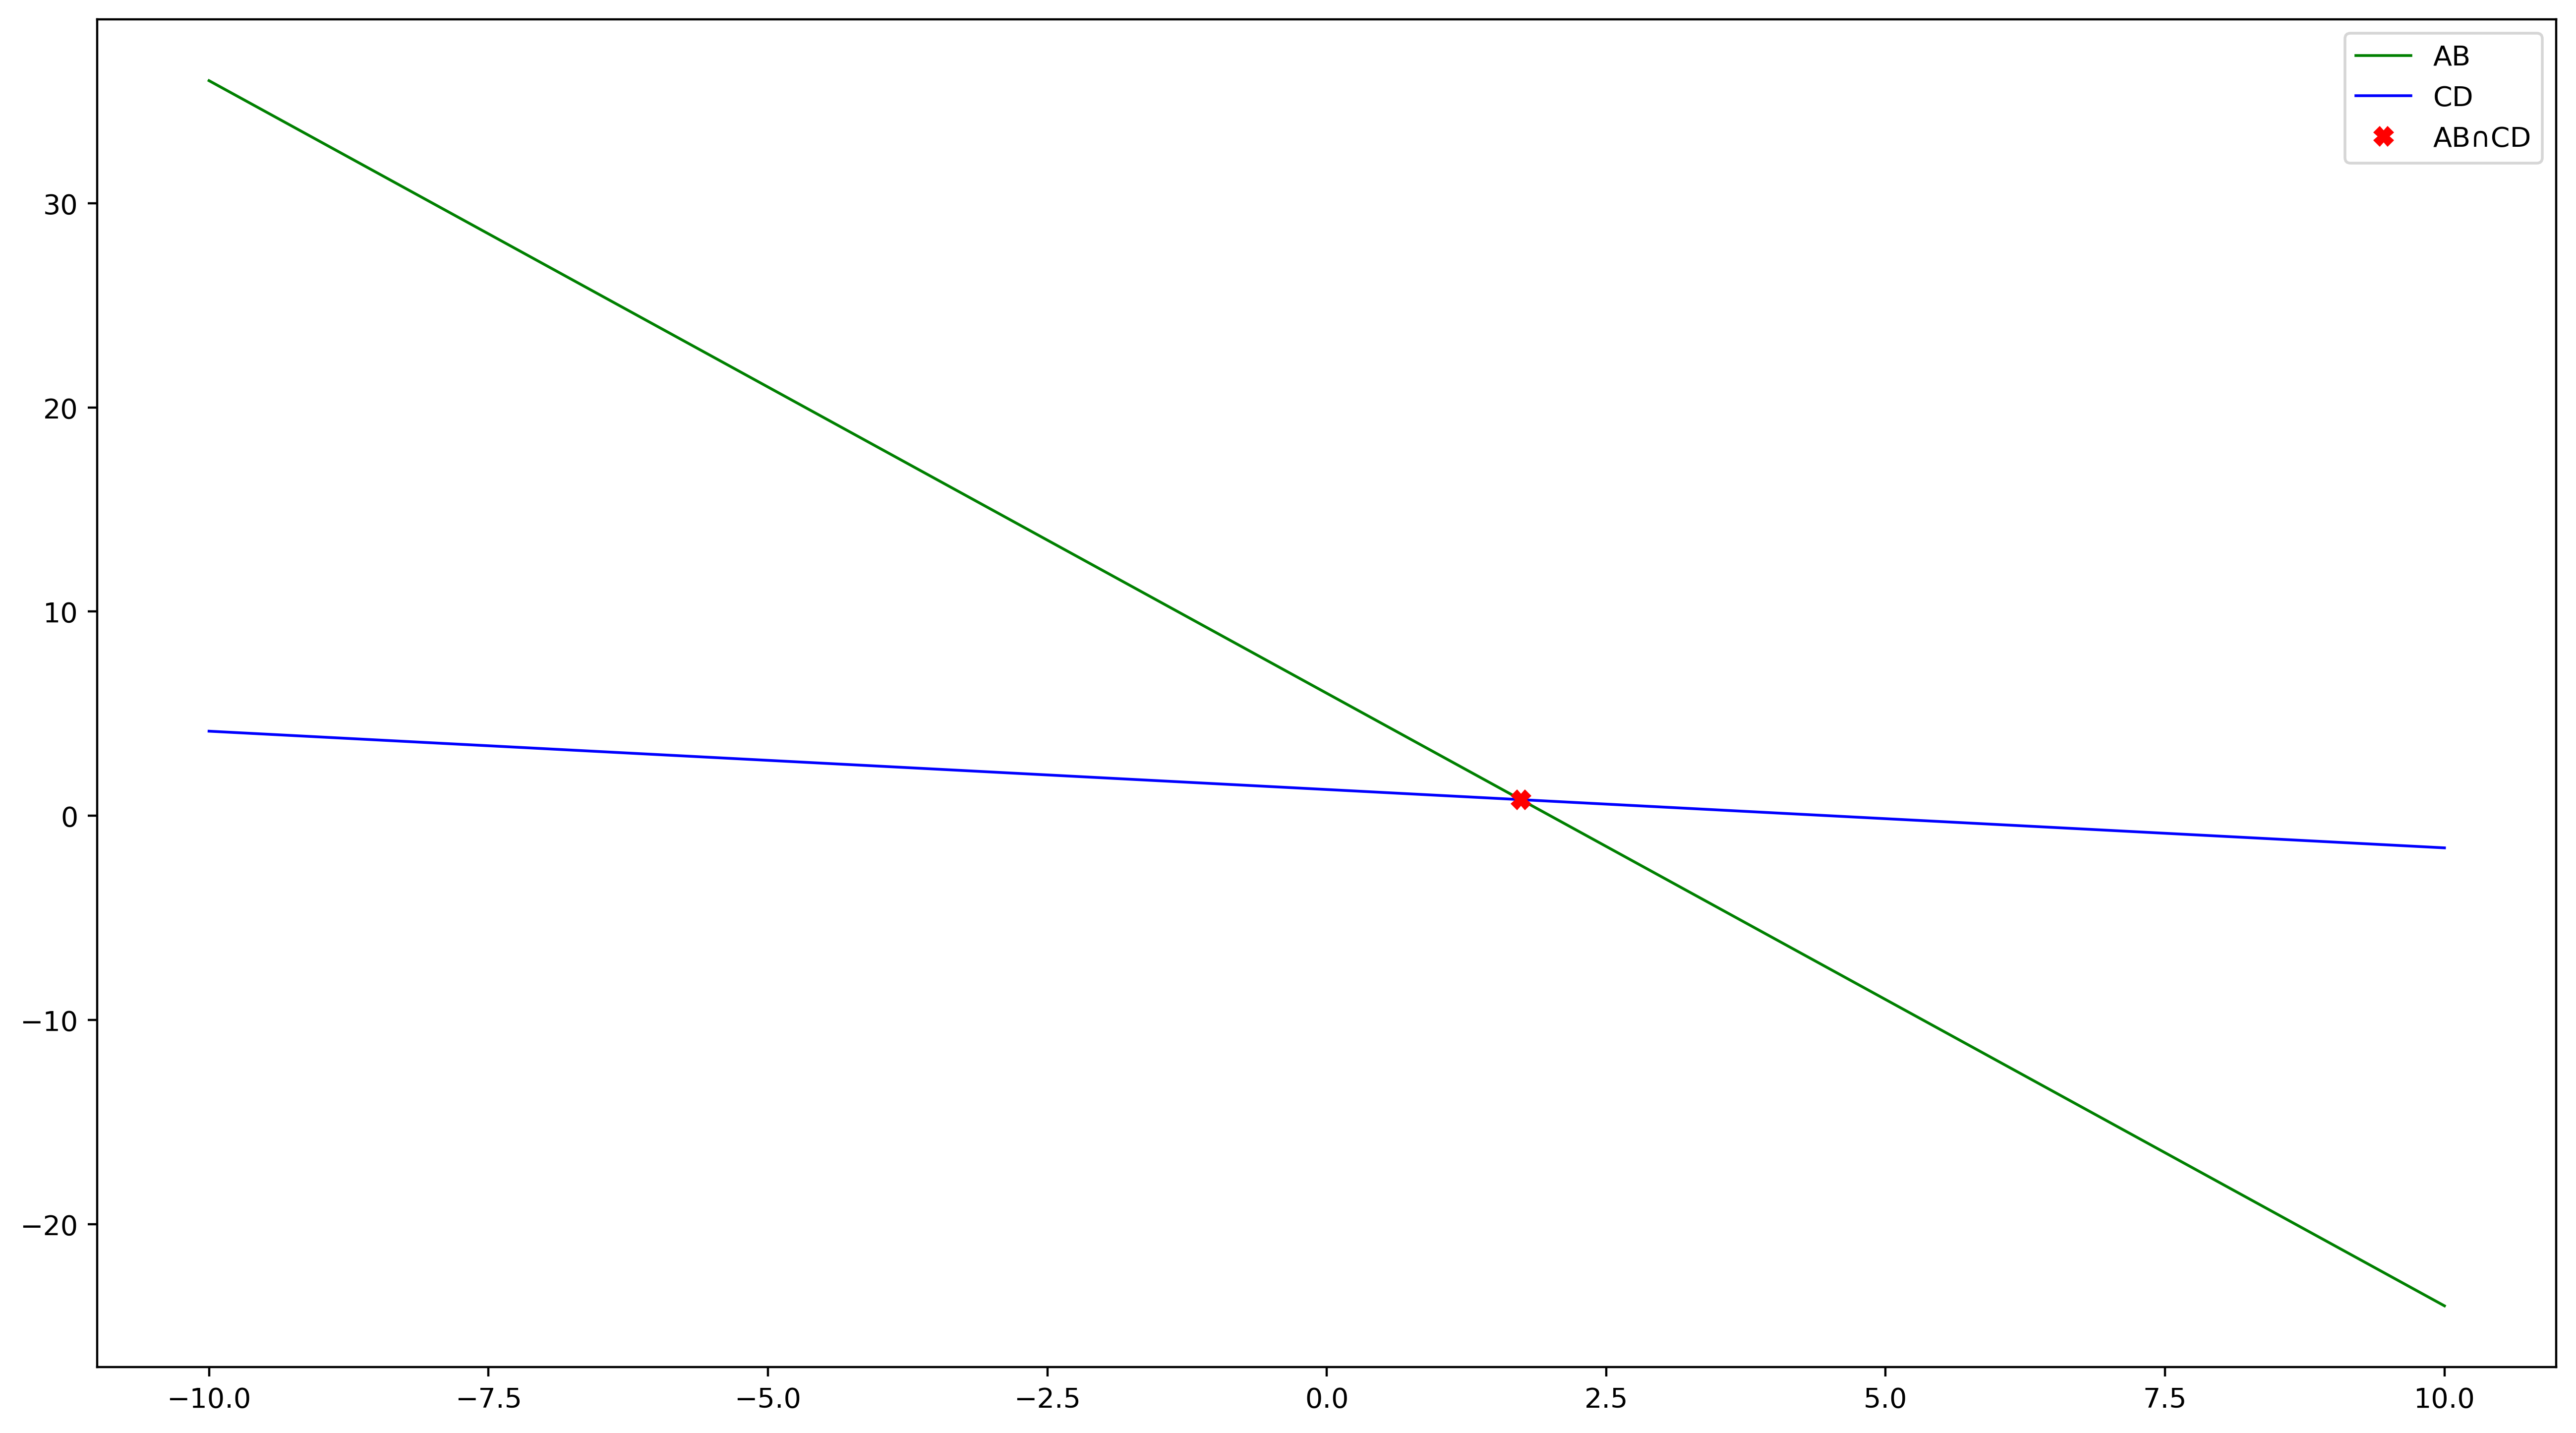

In [9]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 2**10 + 1)
ab_line = (b[0] - x * a[0, 0]) / a[0, 1]
cd_line = (b[1] - x * a[1, 0]) / a[1, 1]

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, ab_line, color='green', lw=1, label='AB')
subplot.plot(x, cd_line, color='blue', lw=1, label='CD')
subplot.plot(o[0], o[1], 'Xr', lw=1, label='AB∩CD')
plt.legend()
plt.show()

In [10]:
epsilon = 0.1
a_interval = np.array([
    [interval(a[0, 0], a[0, 0] + epsilon), interval(a[0, 1], a[0, 1] + epsilon)],
    [interval(a[1, 0], a[1, 0] + epsilon), interval(a[1, 1], a[1, 1] + epsilon)],
])
b_interval = np.array([interval(b[0], b[0] + epsilon), interval(b[1], b[1] + epsilon)])

solve2(a_interval, b_interval)

array([[[1.73684211, 1.73684211],
        [1.69035533, 1.69035533]],

       [[0.78947368, 0.78947368],
        [0.78172589, 0.78172589]]])

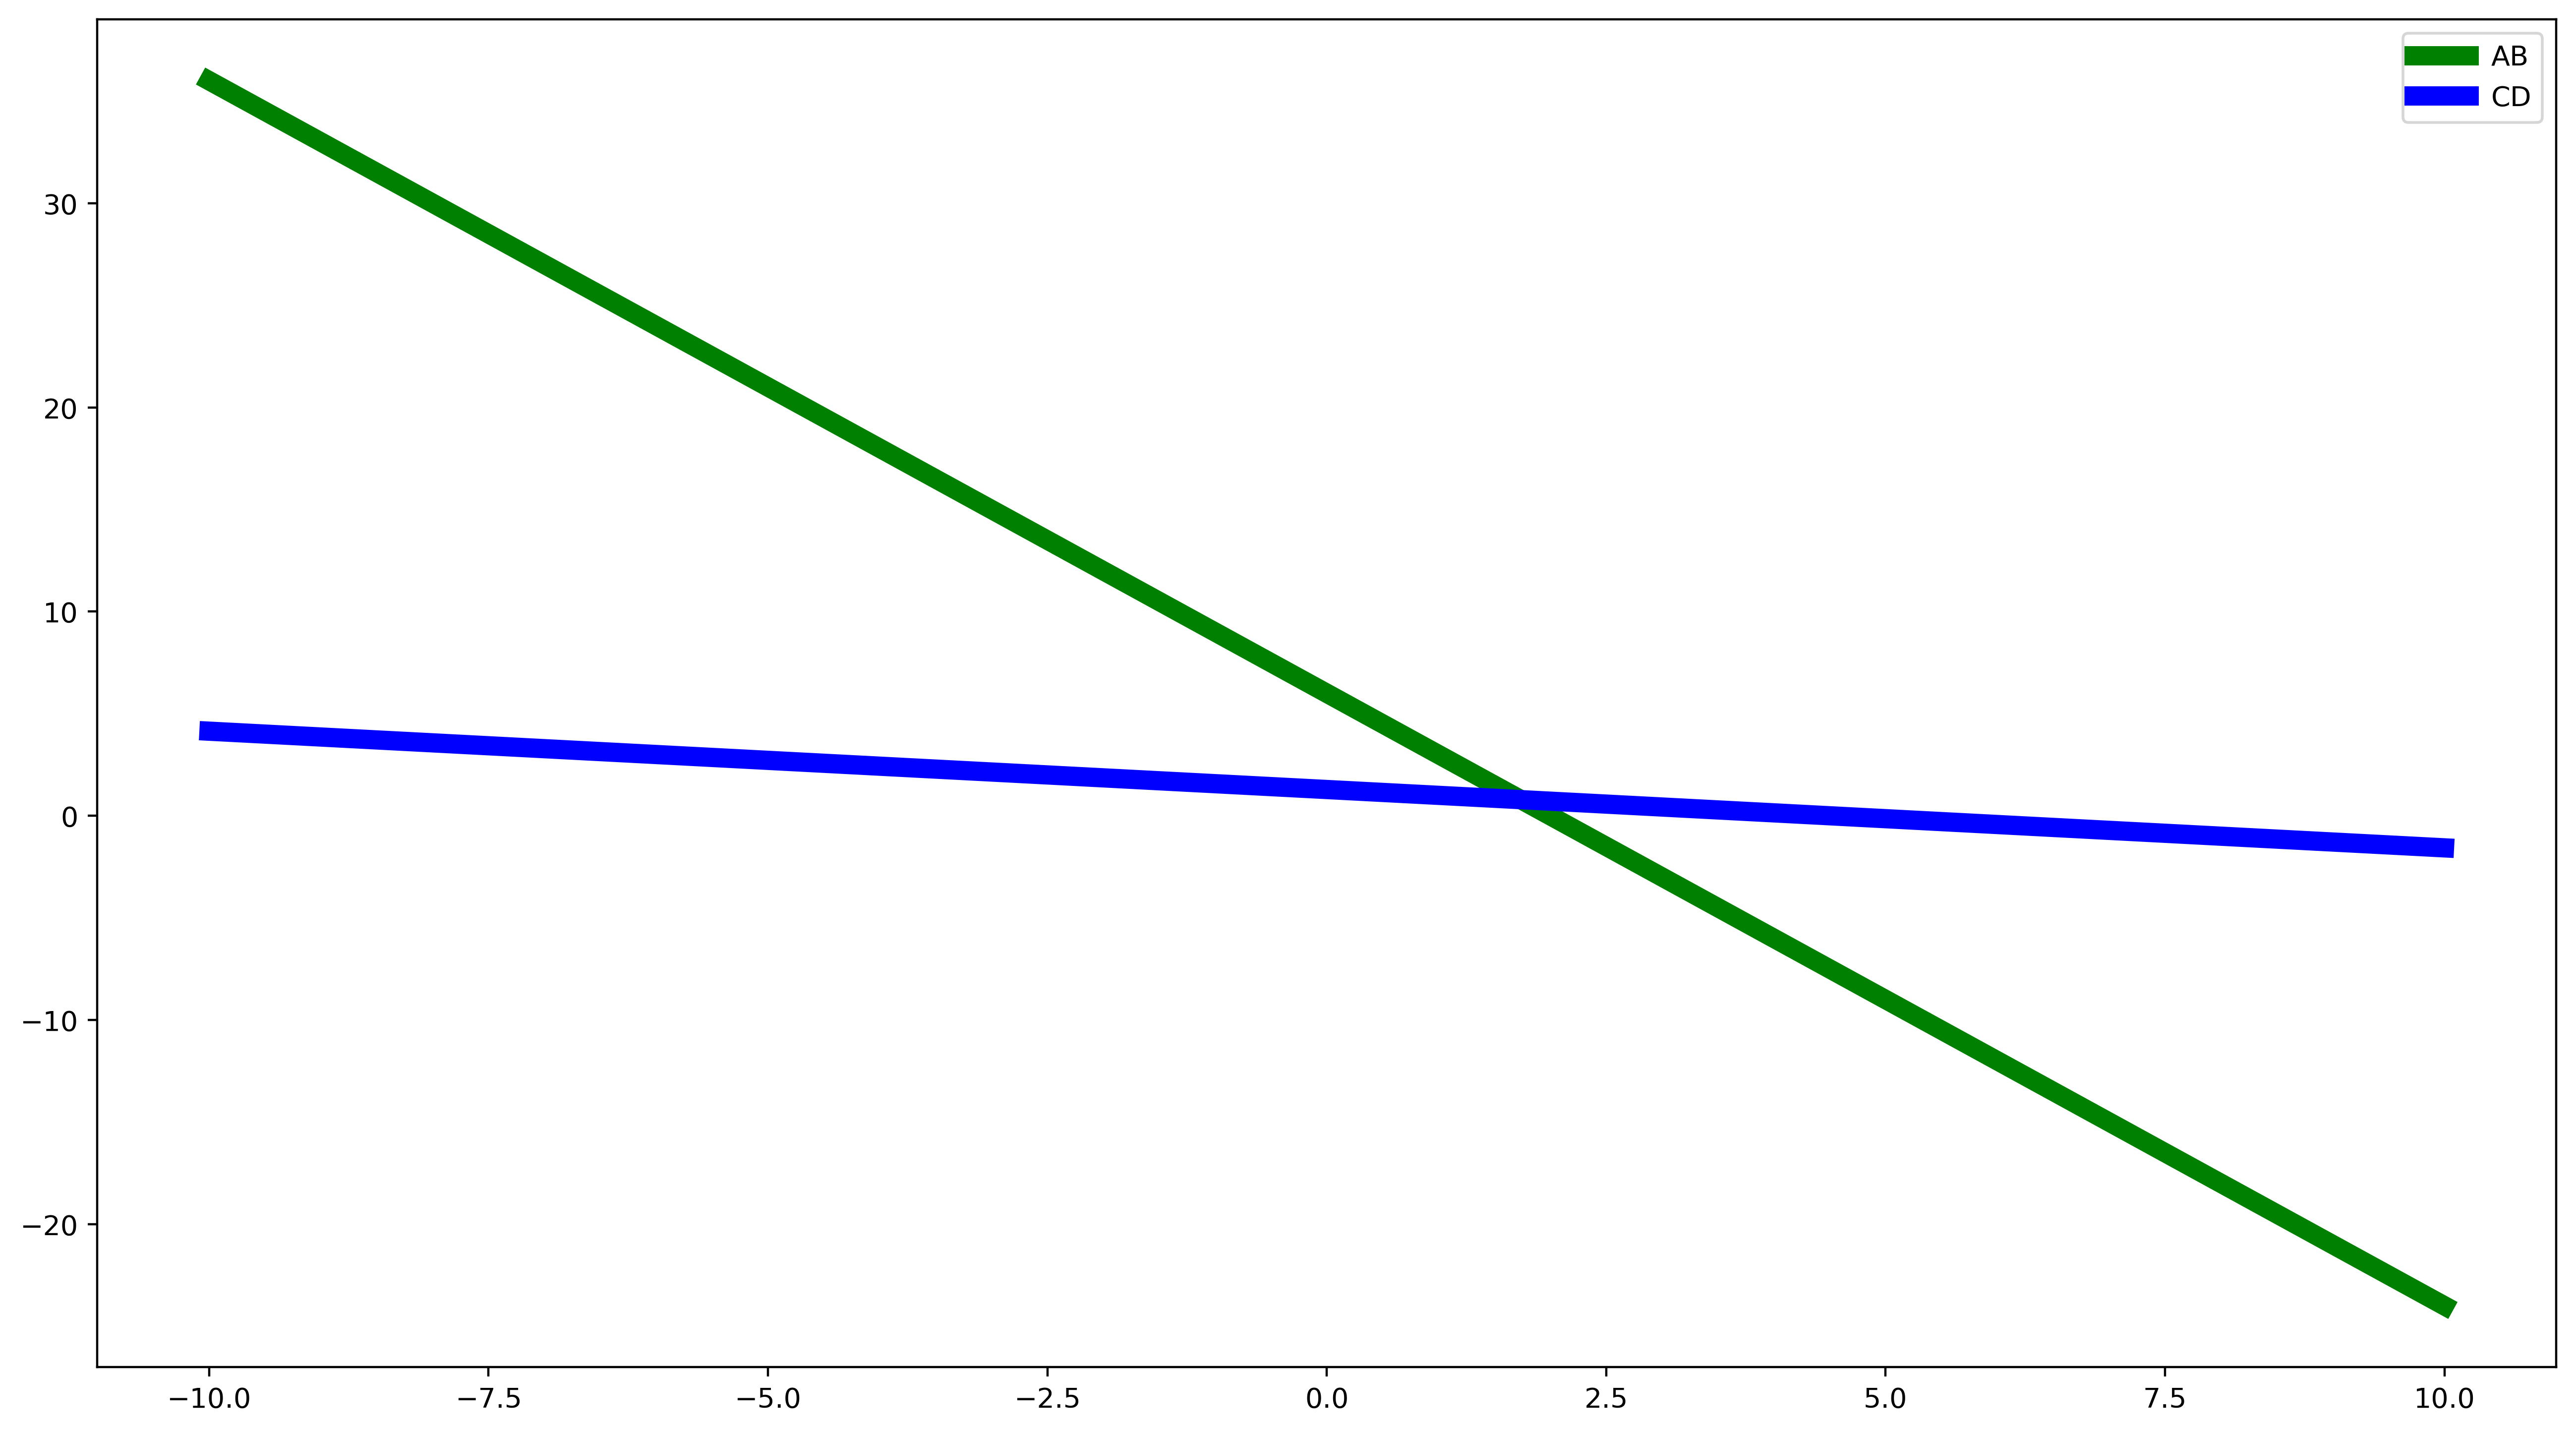

In [13]:
x = np.linspace(-10, 10, 2**10 + 1)
ab_line = (b[0] - x * a[0, 0]) / a[0, 1]
cd_line = (b[1] - x * a[1, 0]) / a[1, 1]

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, ab_line, color='green', lw=7, label='AB')
subplot.plot(x, cd_line, color='blue', lw=7, label='CD')
plt.legend()
plt.show()

In [ ]:
ab = np.array([b[0] / a[0, 0], b[0] / a[0, 1])
cd = np.array([b[1] / a[1, 0], b[1] / a[1, 1])
t = np.linspace(-10, 10, 2**10 + 1)
ab_line = o + t * ab
cd_line = o + t * cd